In [1]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import numpy as np

In [2]:
#!pip install quandl
import quandl
# Get data via Quandl API
df = quandl.get('WIKI/AAPL')

In [3]:
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0


In [4]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [5]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1,1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
2,1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
3,1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
4,1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [6]:
df=df.drop(['Date','Ex-Dividend','Split Ratio','Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,28.75,28.87,28.75,28.75,2093900.0
1,27.38,27.38,27.25,27.25,785200.0
2,25.37,25.37,25.25,25.25,472000.0
3,25.87,26.00,25.87,25.87,385900.0
4,26.63,26.75,26.63,26.63,327900.0


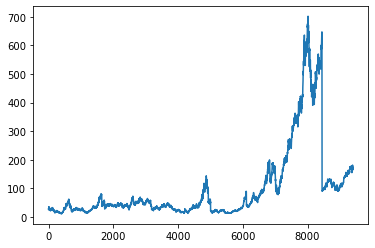

In [7]:
plt.plot(df.Close)

In [8]:
ma100= df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
9395    171.90042
9396    172.02482
9397    172.10012
9398    172.19732
9399    172.21352
Name: Close, Length: 9400, dtype: float64

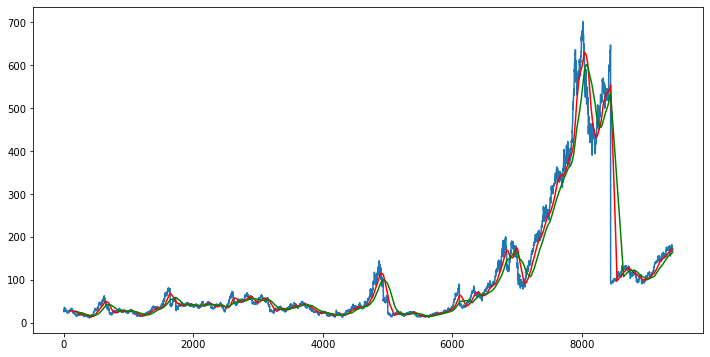

In [9]:
ma200= df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'green')

In [10]:
df.shape

(9400, 5)

In [11]:
#Splitting data into testing and training
data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [12]:
data_training.shape

(6580, 1)

In [13]:
data_testing.shape

(2820, 1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

C:\Users\Vanshika Mishra\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [15]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.13326826],
       [0.12200616],
       [0.10699001],
       ...,
       [0.55912606],
       [0.61243337],
       [0.64569412]])

In [16]:
data_training_array.shape

(6580, 1)

In [17]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train= np.array(x_train),np.array(y_train)

In [18]:
x_train.shape

(6480, 100, 1)

#from models import Sequential
from keras import Dense
from layers import LSTM
from layers import Dropout


In [19]:
!pip install numpy==1.23.4

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [21]:
regressor = Sequential()

regressor.add(LSTM(units = 50,return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60,activation='relu',return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80,activation='relu',return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120,activation='relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [22]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
regressor.fit(x_train, y_train, epochs = 50)

Epoch 1/50
203/203 [==============================] - 58s 238ms/step - loss: 0.0055
Epoch 2/50
203/203 [==============================] - 53s 262ms/step - loss: 0.0028
Epoch 3/50
203/203 [==============================] - 49s 240ms/step - loss: 0.0023
Epoch 4/50
203/203 [==============================] - 48s 235ms/step - loss: 0.0021
Epoch 5/50
203/203 [==============================] - 57s 283ms/step - loss: 0.0018
Epoch 6/50
203/203 [==============================] - 60s 293ms/step - loss: 0.0014
Epoch 7/50
203/203 [==============================] - 48s 234ms/step - loss: 0.0015
Epoch 8/50
203/203 [==============================] - 49s 243ms/step - loss: 0.0014
Epoch 9/50
203/203 [==============================] - 45s 223ms/step - loss: 0.0013
Epoch 10/50
203/203 [==============================] - 48s 238ms/step - loss: 0.0013
Epoch 11/50
203/203 [==============================] - 48s 235ms/step - loss: 0.0012
Epoch 12/50
203/203 [==============================] - 54s 264ms/step - lo

In [24]:
regressor.save('mymodel')

INFO:tensorflow:Assets written to: mymodel\assets


INFO:tensorflow:Assets written to: mymodel\assets


In [25]:
data_testing.head()

,Close
6580,95.80
6581,94.62
6582,97.10
6583,94.95
6584,89.07


In [26]:
past_100_days= data_training.tail(100)
final_df=past_100_days.append(data_testing,ignore_index=True)

<ipython-input-26-a5957b0fd567>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [27]:
final_df.head()

,Close
0,67.59
1,67.91
2,66.56
3,67.62
4,67.31


In [28]:
input_data= scaler.fit_transform(final_df)
input_data

array([[1.74632642e-03],
       [2.24977188e-03],
       [1.25861364e-04],
       ...,
       [1.54903873e-01],
       [1.67222554e-01],
       [1.60252981e-01]])

In [29]:
input_data.shape

(2920, 1)

In [30]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [31]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test)
print(y_test)

[[[1.74632642e-03]
  [2.24977188e-03]
  [1.25861364e-04]
  ...
  [2.98763412e-02]
  [4.10465372e-02]
  [4.80161103e-02]]

 [[2.24977188e-03]
  [1.25861364e-04]
  [1.79352443e-03]
  ...
  [4.10465372e-02]
  [4.80161103e-02]
  [4.61281898e-02]]

 [[1.25861364e-04]
  [1.79352443e-03]
  [1.30581165e-03]
  ...
  [4.80161103e-02]
  [4.61281898e-02]
  [4.42717347e-02]]

 ...

 [[1.43057173e-01]
  [1.51930399e-01]
  [1.57704289e-01]
  ...
  [1.71108524e-01]
  [1.64862654e-01]
  [1.61047481e-01]]

 [[1.51930399e-01]
  [1.57704289e-01]
  [1.61354268e-01]
  ...
  [1.64862654e-01]
  [1.61047481e-01]
  [1.54903873e-01]]

 [[1.57704289e-01]
  [1.61354268e-01]
  [1.57971744e-01]
  ...
  [1.61047481e-01]
  [1.54903873e-01]
  [1.67222554e-01]]]
[0.04612819 0.04427173 0.04817344 ... 0.15490387 0.16722255 0.16025298]


In [32]:
y_predicted= regressor.predict(x_test)


In [33]:
y_predicted.shape

(2820, 1)

In [34]:
scaler.scale_

array([0.00157327])

In [1]:
scale_factor=0.00157327
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor


NameError: name 'y_predicted' is not defined

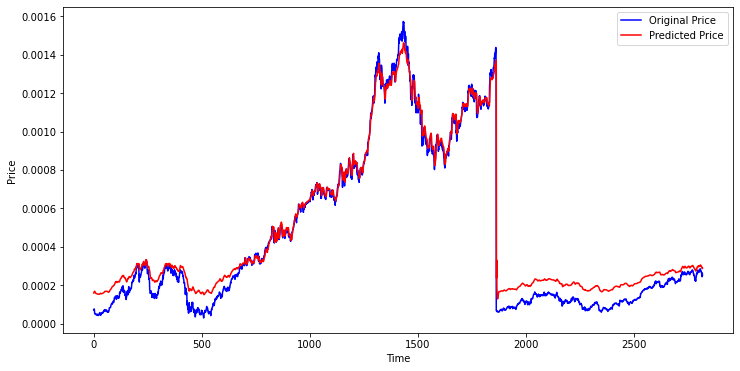

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()